In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
path = '../outputs/gsm8k/hyperparameter3B.json'

In [10]:
# Load the JSON file
with open(path, 'r') as f:
    data = json.load(f)

In [11]:
# Convert to DataFrame
df = pd.DataFrame(data)
df.head()

,model,temp,top_p,score
0,meta-llama/Llama-3.2-3B-Instruct,0.3,0.95,0.973244
1,meta-llama/Llama-3.2-3B-Instruct,0.5,0.95,0.977926
2,meta-llama/Llama-3.2-3B-Instruct,0.7,0.95,0.977258
3,meta-llama/Llama-3.2-3B-Instruct,0.9,0.95,0.965217
4,meta-llama/Llama-3.2-3B-Instruct,1.1,0.95,0.935786


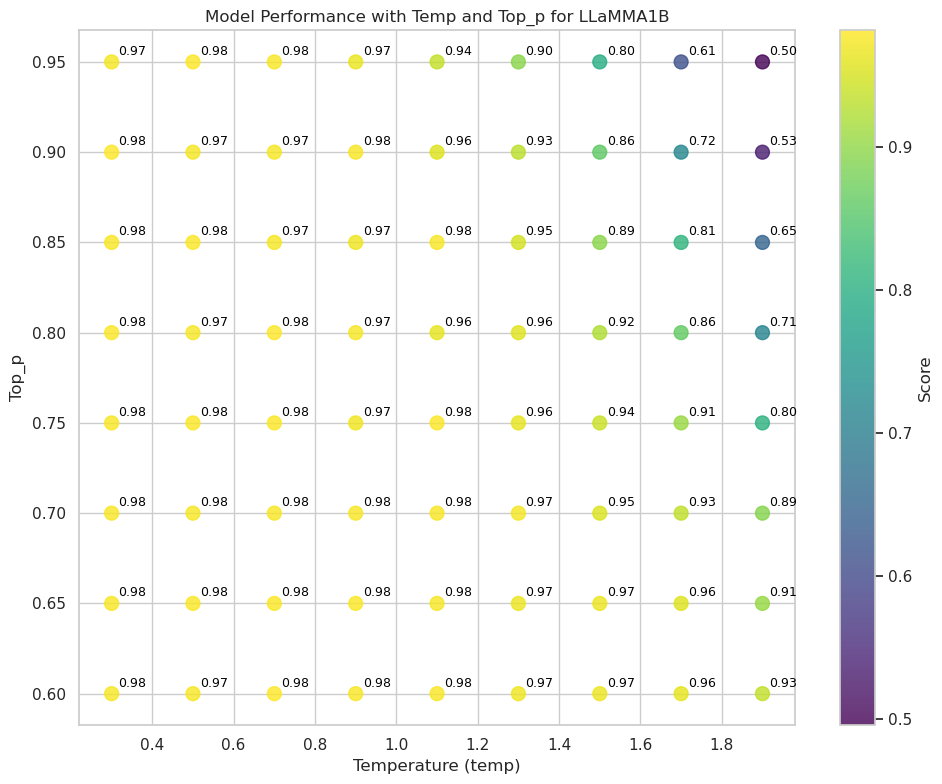

In [12]:
# Set style
sns.set(style="whitegrid")

# Create scatter plot with score as color
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    x=df["temp"], 
    y=df["top_p"], 
    c=df["score"],  # Use score for color
    cmap="viridis",  # Color map for scores
    s=100,  # Marker size
    alpha=0.8  # Transparency
)

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label("Score")

# Add annotations (scores) next to each point
for i in range(len(df)):
    plt.annotate(
        f'{df["score"].iloc[i]:.2f}',  # Format score to 2 decimal places
        (df["temp"].iloc[i], df["top_p"].iloc[i]),  # Position based on temp and top_p
        textcoords="offset points",  # Position relative to the point
        xytext=(5, 5),  # Offset for better visibility
        fontsize=9,  # Adjust text size
        color="black"  # Text color
    )


# Customize the plot
plt.title("Model Performance with Temp and Top_p for LLaMMA1B")
plt.xlabel("Temperature (temp)")
plt.ylabel("Top_p")
plt.grid(True)
plt.tight_layout()

plt.savefig("model_performance_plot_3B.png", dpi=300)  # Save as PNG with high resolution
# Show the plot
plt.show()